In [1]:
import scanpy as sc
import sys
sys.path.append('/wsfish/glioblastoma/')
import FISHspace as sp
import numpy as np
import squidpy as sq
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

# make font changeable in Illustrator
mpl.rcParams['pdf.fonttype'] = 42

# save figure with no pad
mpl.rcParams['savefig.pad_inches'] = 0
mpl.rcParams['savefig.bbox'] = 'tight'

# set axes width
mpl.rcParams['axes.linewidth'] = 0.2
mpl.rcParams['xtick.minor.pad'] = 0
mpl.rcParams['xtick.major.pad'] = 0
mpl.rcParams['ytick.minor.pad'] = 0
mpl.rcParams['ytick.major.pad'] = 0
mpl.rcParams['xtick.minor.width'] = 0.2
mpl.rcParams['xtick.major.width'] = 0.2
mpl.rcParams['ytick.minor.width'] = 0.2
mpl.rcParams['ytick.major.width'] = 0.2

# use colorblind seaborn style
plt.style.use('seaborn-colorblind')

2023-08-29 19:19:35.640045: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
palette = {
    'AC-li../DataSubmission/:'#2ecc71',#inchworm B4FF9F
    'AC-like 2':'#2ecc71',#inchworm B4FF9F
    'AC-like 4':'#2ecc71',#inchworm B4FF9F
    'AC-like 5':'#2ecc71',#inchworm B4FF9F
    'AC-like 6':'#2ecc71',#inchworm B4FF9F
    'AC-like 7':'#2ecc71',#inchworm B4FF9F
    'AC-like 8':'#2ecc71',#inchworm B4FF9F

    'preOPC-like 1':'#7befb2',#'#c2f970'
    
    'GW-like 2': '#EDE8F3',
    'GW-like 3': '#E2D8EA',
    'GW-like 1': '#D6BEDD',
    'GW-like 5': '#CFA8D1',
    'GW-like 4': '#CA90C5',
    'GW-like 7': '#D873B6',
    'GW-like 8': '#C50F53',
    'GW-like 6': '#840034',

    
    'nIPC-like 1':'#FFF192',
    'nIPC-like 2':'#FFF192',
    'nIPC-like 3':'#FFF192',
    
    'RG-like':'#ff9470',
    'nIPC-RG-like':'#ff9470',
    
    'OPC-like 1':'#89c4f4', #bright turquoise
    'OPC-like 2':'#89c4f4', #bright turquoise
    'OPC-like 3':'#89c4f4', #bright turquoise
    
    'Endothelial':'#d5b8ff', #mauve
    'Endothelial 1':'#d5b8ff', #mauve
    'Mural cell': '#8c14fc',  #electric indigo
    'Mural cell 2': '#8c14fc',  #electric indigo
    'Mural': '#8c14fc',  #electric indigo
    
    'FB-like 1': '#FF6EC7', #fff9de
    'FB-like 2': '#FF6EC7', #fff9de
    'FB-like 3': '#FF6EC7', #fff9de
    
    'Mono 1': '#FBFCFA',#'#c8f7c5',#'#e6d9cb',#'#cdd1e4',#'#f4ede4',
    'Mono 2': '#FBFCFA',
    
    'TAM-BDM 1':'#e88474',#'#F5C9B0',
    'TAM-BDM 2':'#A94A54',
    
    'TAM-BDM 3':'#DC9D57',    #'#89c4f4',#'#95a5a6',#'#ecd9dd',
    'TAM-BDM 4':'#DC9D57',#'#A5765C',
    
    'TAM-MG':'#825e5c', #'#00b5cc' (blue),
    
    'DC': '#a6915c',

}


In [ ]:
adata = sc.read_h5ad('../DataSubmission/GBM_Linnarsson_EEL.h5ad')
adata = adata[adata.obs.Sample.isin(['SL016A','SL020'])]

In [6]:
adata_tumor = adata[adata.obs['m-states'].isin([
    'AC-like 1', 'AC-like 2', 'AC-like 3', 'AC-like 4', 'AC-like 5','AC-like 6', 
    'GBL-like 1','GBL-like 2',
    'FB-like 1', 'FB-like 2', 'FB-like 3',
    'GW-like 1','GW-like 2', 'GW-like 3', 'GW-like 4', 
    'GW-like 5', 'GW-like 6','GW-like 7', 'GW-like 8',
    'nIPC-like 1', 'nIPC-like 2','nIPC-like 3', 
    'OPC-like 1', 'OPC-like 2', 'OPC-like 3',
    'RG-like', 'nIPC-RG-like',
    'preOPC-like 1',
    'Endothelial 1',
    ])]

In [7]:
mini = adata_tumor[adata_tumor.X.sum(axis=1) > 20].copy()
#sp.pp.preprocess(mini)
sc.pp.normalize_total(mini)
sc.pp.log1p(mini)

sc.pp.pca(mini)
sc.pp.neighbors(mini)

sc.tl.umap(mini)

In [12]:
gliosarcoma_palette = {
    'RG-like': '#93faa5',
    'nIPC-RG-like': '#93faa5',
    
    'FB-like 3': '#89c4f4',
    'FB-like 1': '#89c4f4',
    
    'GW-like 2': '#EDE8F3',
    'GW-like 3': '#E2D8EA',
    'GW-like 1': '#D6BEDD',
    'GW-like 5': '#CFA8D1',
    'GW-like 4': '#CA90C5',
    'GW-like 7': '#D873B6',

    'GW-like 8': '#C50F53',
    'GW-like 6': '#d2527f',

    'Endothelial 1': '#8c14fc',
    
    'AC-like 1':'#f2784b',
    'AC-like 2':'#f2784b',
    'AC-like 4':'#f2784b',
    'AC-like 5':'#f2784b', 
    'AC-like 6':'#f2784b', 
    
}

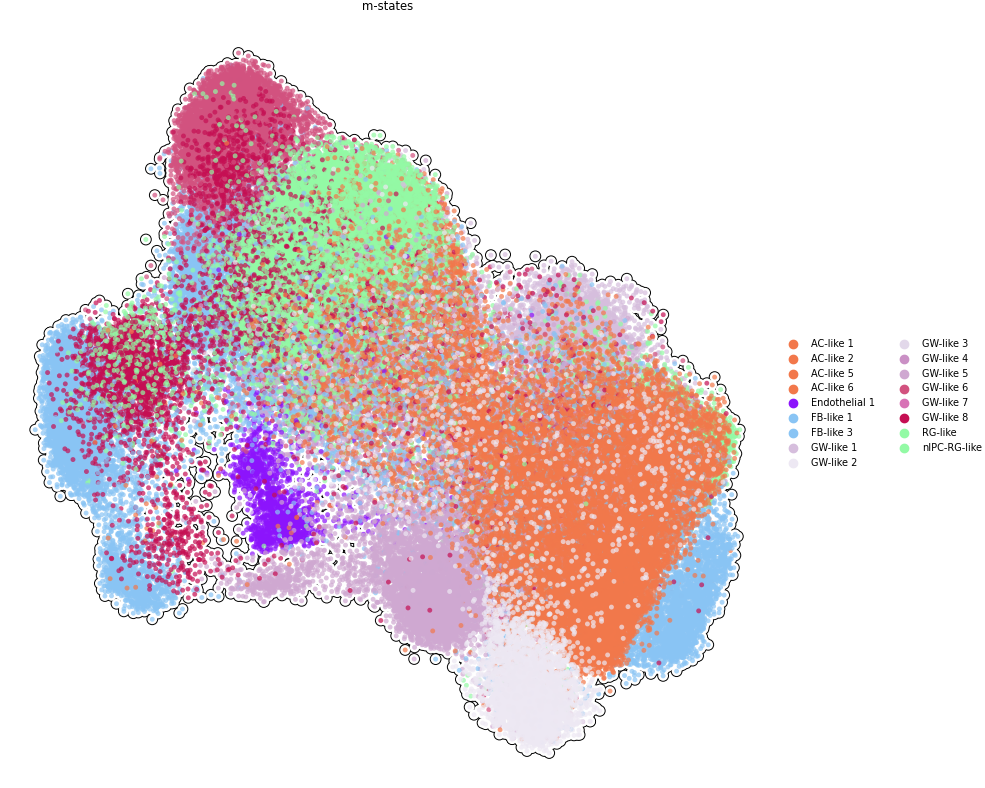

In [13]:
fig = plt.figure(figsize=[10,10]) 
ax1 = fig.subplots(1, 1, sharex=False, sharey=False)

sc.pl.umap(
    mini[mini.obs['m-states'].isin(gliosarcoma_palette.keys())],
    color=[
        'm-states',
    ],
    palette=gliosarcoma_palette,
    add_outline=True, 
    outline_width=(0.2,0.5),
    frameon=False,
    ax=ax1,
    size=50,
    show=False,
)
plt.show()

coExp 1541
242


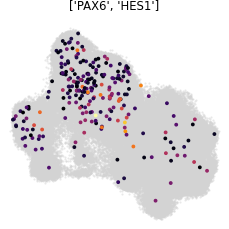

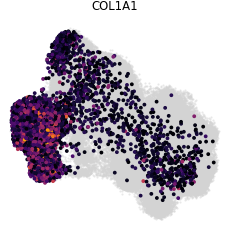

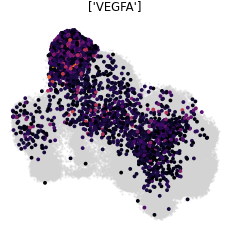

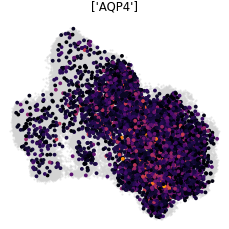

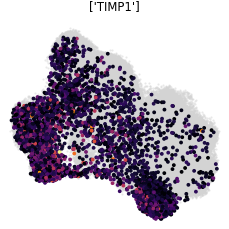

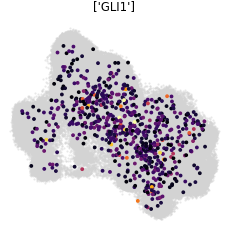

In [14]:
sp.pl.gene_umap(
    mini,
    color=[
        ['PAX6','HES1'],
          ],
    cmap='inferno',
    figsize=(2.5,2.5),
    
    ncols=1,
    s=3,
    bgval=1,
    co_expression=True,


)
sp.pl.gene_umap(
    mini,
    color=[
        'COL1A1',
          ],
    cmap='inferno',
    figsize=(2.5,2.5),
    ncols=1,
    s=3,
    bgval=1,


)
sp.pl.gene_umap(
    mini,
    color=[
        ['VEGFA'],
          ],
    cmap='inferno',
    figsize=(2.5,2.5),
    ncols=1,
    s=3,
    bgval=1,


)
sp.pl.gene_umap(
    mini,
    color=[
        ['AQP4'],
          ],
    cmap='inferno',
    figsize=(2.5,2.5),
    ncols=1,
    s=3,
    bgval=1,


)
sp.pl.gene_umap(
    mini,
    color=[
        ['TIMP1'],
          ],
    cmap='inferno',
    figsize=(2.5,2.5),
    ncols=1,
    s=3,
    bgval=1,


)

sp.pl.gene_umap(
    mini,
    color=[
        ['GLI1'],
          ],
    cmap='inferno',
    figsize=(2.5,2.5),
    ncols=1,
    s=3,
    bgval=1,


)
